In [1]:
import numpy as np, pandas as pd, tensorflow as tf
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/기계학습 8주차/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [2]:
# 2. 정규화
data = df[['Open','High','Low','Close']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [3]:
# 3. 시퀀스 생성

window = 30

X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window, 3]) #종가만 타깃으로 (열 인덱스 3 설정)

X = np.array(X)
y = np.array(y).reshape(-1,1) #(N,1) 단일 타깃으로 종가 설정한다.

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=False)

rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,4)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['mse', 'mae'])
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0067 - mae: 0.0597 - mse: 0.0134
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 9.5489e-05 - mae: 0.0106 - mse: 1.9098e-04
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 5.4951e-05 - mae: 0.0081 - mse: 1.0990e-04
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4.6276e-05 - mae: 0.0076 - mse: 9.2553e-05
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 2.6620e-05 - mae: 0.0056 - mse: 5.3240e-05
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.4907e-05 - mae: 0.0055 - mse: 4.9813e-05
Epoch 7/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 3.6883e-05 - mae: 0.0067 - mse: 7.3767e-05
Epoch 8/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.9512e-05 - mae: 0.0049 - mse: 3.9024e-05
Epoch 9/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.7779e-05 - mae: 0.0048 - mse: 3.5558e-05
Epoch 10/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 1.4679e-0

In [5]:
# 4. LSTM 모델
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,4)),
    tf.keras.layers.Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 6.4115e-05 - mae: 0.0042 - mse: 6.4115e-05
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.6814e-06 - mae: 0.0014 - mse: 3.6814e-06
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 3.5353e-06 - mae: 0.0014 - mse: 3.5353e-06
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 3.7441e-06 - mae: 0.0014 - mse: 3.7441e-06
Epoch 5/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 3.3087e-06 - mae: 0.0013 - mse: 3.3087e-06
Epoch 6/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.1604e-06 - mae: 0.0013 - mse: 3.1604e-06
Epoch 7/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 2.2943e-06 - mae: 0.0011 - mse: 2.2943e-06
Epoch 8/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.0463e-06 - mae: 0.0010 - mse: 2.0463e-06
Epoch 9/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.2184e-06 - mae: 0.0011 - mse: 2.2184e-06
Epoch 10/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 2.

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


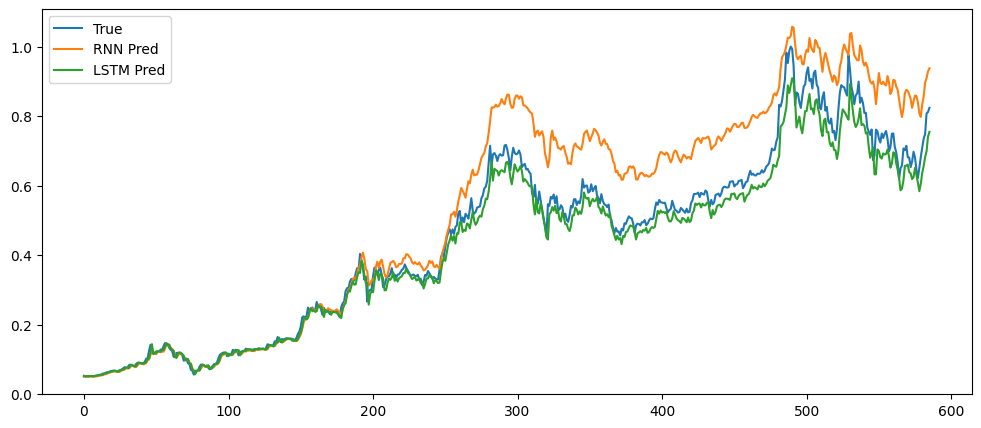

In [10]:
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)


plt.figure(figsize=(12,5))
plt.plot(y_test, label='True')
plt.plot(rnn_pred, label='RNN Pred')
plt.plot(lstm_pred, label='LSTM Pred')
plt.legend()
plt.show()


In [7]:
rnn_model.evaluate(X, y)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0343e-04 - mae: 0.0027 - mse: 2.0686e-04


[0.001265640603378415, 0.00253128120675683, 0.018326599150896072]

In [8]:
lstm_model.evaluate(X, y)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.3122e-05 - mae: 9.2563e-04 - mse: 2.3122e-05


[0.00032441416988149285, 0.00032441416988149285, 0.006264708936214447]

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
def report(name, y, yhat):
    mse  = mean_squared_error(y, yhat)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y, yhat)
    print(f"{name:8s} | MSE: {mse:.4f}  RMSE: {rmse:.4f}  MAE: {mae:.4f}")
report('RNN', y_test, rnn_pred)
report('LSTM', y_test, lstm_pred)


RNN      | MSE: 0.0126  RMSE: 0.1124  MAE: 0.0864
LSTM     | MSE: 0.0016  RMSE: 0.0402  MAE: 0.0286
